#                                   COVID 19 DATA ANALYSIS

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
cd = pd.read_csv('cases_country.csv')

In [20]:
cd.shape

(201, 16)

In [21]:
cd.head(11)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2022-09-19 08:21:47,33.93911,67.709953,197240,7795,NaN,NaN,506.674559,NaN,NaN,3.952038,4,AFG,6597,33
1,Albania,2022-09-19 08:21:47,41.15330,20.168300,331583,3586,NaN,NaN,11522.100215,NaN,NaN,1.081479,8,ALB,5506,10
2,Algeria,2022-09-19 08:21:47,28.03390,1.659600,270609,6879,NaN,NaN,617.109609,NaN,NaN,2.542044,12,DZA,804,1
3,Andorra,2022-09-19 08:21:47,42.50630,1.521800,46147,155,NaN,NaN,59725.619621,NaN,NaN,0.335883,20,AND,172,1
4,Angola,2022-09-19 08:21:47,-11.20270,17.873900,103131,1917,NaN,NaN,313.789810,NaN,NaN,1.858801,24,AGO,495,0
5,Antarctica,2022-09-19 08:21:47,-71.94990,23.347000,11,0,NaN,NaN,NaN,NaN,NaN,0.000000,10,ATA,0,0
6,Antigua and Barbuda,2022-09-19 08:21:47,17.06080,-61.796400,9008,145,NaN,NaN,9198.594886,NaN,NaN,1.609680,28,ATG,113,1
7,Argentina,2022-09-19 08:21:47,-38.41610,-63.616700,9703938,129855,NaN,NaN,21470.895389,NaN,NaN,1.338168,32,ARG,45547,209
8,Armenia,2022-09-19 08:21:47,40.06910,45.038200,439302,8669,NaN,NaN,14825.086375,NaN,NaN,1.973358,51,ARM,8941,26
9,Australia,2022-09-19 08:21:47,-25.00000,133.000000,10159613,14763,NaN,NaN,39904.684658,NaN,NaN,0.145311,36,AUS,237364,1394


In [22]:
cd.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
count,199.000000,199.000000,2.010000e+02,2.010000e+02,0.0,0.0,196.000000,0.0,0.0,201.000000,201.000000,2.010000e+02,201.000000
mean,18.730091,21.601355,3.044619e+06,3.247000e+04,NaN,NaN,15566.375381,NaN,NaN,4.482596,531.935323,7.899364e+04,269.955224
std,24.708224,67.238747,9.168601e+06,1.061239e+05,NaN,NaN,17111.165724,NaN,NaN,42.272316,945.148116,3.487452e+05,1086.676444
min,-71.949900,-175.198200,1.000000e+00,0.000000e+00,NaN,NaN,0.003879,NaN,NaN,0.000000,4.000000,0.000000e+00,0.000000
25%,4.064892,-6.319850,3.718700e+04,3.720000e+02,NaN,NaN,1108.827378,NaN,NaN,0.475782,212.000000,1.950000e+02,0.000000
50%,17.357822,21.005900,2.887210e+05,3.163000e+03,NaN,NaN,9327.484236,NaN,NaN,1.067786,428.000000,2.047000e+03,7.000000
75%,40.106100,49.533194,1.660635e+06,1.688200e+04,NaN,NaN,25184.092873,NaN,NaN,1.947141,662.000000,2.198700e+04,105.000000
max,64.963100,178.065000,9.565828e+07,1.053420e+06,NaN,NaN,60557.487183,NaN,NaN,600.000000,9999.000000,3.505350e+06,12705.000000


In [23]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       201 non-null    object 
 1   Last_Update          201 non-null    object 
 2   Lat                  199 non-null    float64
 3   Long_                199 non-null    float64
 4   Confirmed            201 non-null    int64  
 5   Deaths               201 non-null    int64  
 6   Recovered            0 non-null      float64
 7   Active               0 non-null      float64
 8   Incident_Rate        196 non-null    float64
 9   People_Tested        0 non-null      float64
 10  People_Hospitalized  0 non-null      float64
 11  Mortality_Rate       201 non-null    float64
 12  UID                  201 non-null    int64  
 13  ISO3                 197 non-null    object 
 14  Cases_28_Days        201 non-null    int64  
 15  Deaths_28_Days       201 non-null    int

In [24]:
cd.isnull().sum()

Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered              201
Active                 201
Incident_Rate            5
People_Tested          201
People_Hospitalized    201
Mortality_Rate           0
UID                      0
ISO3                     4
Cases_28_Days            0
Deaths_28_Days           0
dtype: int64

# DATA CLEANING

#### Drop columns where all values are missing

In [25]:
cd.dropna(axis=1, how='all' ,inplace=True)

#### Fill missing Incident_Rate with 0 or median

In [26]:
cd['Incident_Rate'] = cd['Incident_Rate'].fillna(0)


In [27]:
cd['ISO3'] = cd['ISO3'].fillna('UKN')

In [28]:
cd[['Lat', 'Long_']] = cd[['Lat', 'Long_']].fillna(0) 

In [29]:
cd.isna().sum()

Country_Region    0
Last_Update       0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Incident_Rate     0
Mortality_Rate    0
UID               0
ISO3              0
Cases_28_Days     0
Deaths_28_Days    0
dtype: int64

Now data is clean for analysis

# BAR CHART

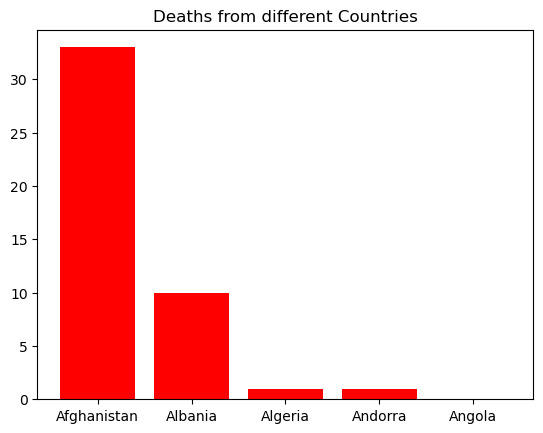

In [47]:

fig, ax = plt.subplots()

x = cd['Country_Region'].head(5)
y = cd['Deaths_28_Days'].head(5)

ax.bar(x, y, color = 'red')
ax.set_title('Deaths from different Countries')
plt.show()